# Dependencies

In [1]:
# Install package for natural language processing
%pip install nltk

# data manipulation
import pandas as pd
import numpy as np
import os

# text analysis tools
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import preprocessing
from nltk import SnowballStemmer
import string

# visualization tools
import matplotlib as mplib
import matplotlib.pyplot as plt 
import seaborn as sns  

%autosave 60

Note: you may need to restart the kernel to use updated packages.


Autosaving every 60 seconds


# Set Paths

In [2]:
# Convert scientific notation to a full float
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Convert scientific notation to a full float
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Set the path to the "Data" folder by replacing "Notebooks" in the current directory path
path = str(os.getcwd()).replace("Notebooks", "Data")

# If the data has been moved, manually set the path below (not recommended for reproducibility)
# path = '...'  # Uncomment and update if needed

# Print the path to verify correctness (varies by computer)
print(path)

C:\Users\NAjani\Jupyter\Wagner\SickleCellProject


In [12]:
# read in a csv file of grants using pd.read_csv() function
df = pd.read_csv(path + '/WagnerData/Data/Projects/SickleCell_Gene_Allyrs.csv', encoding='latin-1')

# Preview Data

In [13]:
# See first 5 rows with head() function
df.head(5)

,NIH Spending Categorization,Project Terms,Project Title,Public Health Relevance,Administering IC,Application ID,Award Notice Date,Opportunity Number,Project Number,Type,...,CFDA Code,Funding Mechanism,Fiscal Year,Total Cost,Total Cost(Sub Projects),Funding IC(s),Direct Cost IC,Indirect Cost IC,NIH COVID-19 Response,Total Cost IC
0,Clinical Research; Hematology; Rare Diseases; ...,Clinical Trials;Collaborations;Data Set;Diseas...,Collaborative Health Research Initiative Progr...,NaN,NHLBI,10975134,,,AHL14007001-1-0-1,,...,,Interagency Agreements,2023,606874,,NHLBI,,,,606874
1,Biotechnology; Clinical Research; Clinical Tri...,Advocate;Caregivers;Collaborations;Communities...,Cure Sickle Cell,NaN,NHLBI,10934820,9/26/2023,OTA-18-003,3OT3HL147741-01S4,3,...,837,Other,2023,3729772,,NHLBI,3729772,0,,3729772
2,Biotechnology; Hematology; Rare Diseases; Sick...,Address;Agreement;Annual Reports;Award;Biotech...,CureSC Manufacturing Resource Platform,NaN,NHLBI,10934634,9/26/2023,OTA-19-010,3OT3HL152932-01S3,3,...,837,Other,2023,1389793,,NHLBI,1389793,0,,1389793
3,Biotechnology; Cancer; Clinical Research; Clin...,Accounting;Acute Graft Versus Host Disease;Ado...,Allogeneic and Autologous Immunotherapy for ca...,NaN,NHLBI,10934196,,,1ZIAHL002345-23,1,...,,Intramural Research,2023,4208801,,NHLBI,,,,4208801
4,Clinical Research; Clinical Trials and Support...,Adverse event;Biological Markers;Cellular Meta...,A Phase 1 Study to Evaluate the Safety and Tol...,NaN,NHLBI,10930552,,,1ZIAHL006284-01,1,...,,Intramural Research,2023,114449,,NHLBI,,,,114449


In [15]:
df.columns

Index(['NIH Spending Categorization', 'Project Terms', 'Project Title',
       'Public Health Relevance', 'Administering IC', 'Application ID',
       'Award Notice Date', 'Opportunity Number', 'Project Number', 'Type',
       'Activity', 'IC', 'Serial Number', 'Support Year', 'Suffix',
       'Program Official Information', 'Project Start Date',
       'Project End Date', 'Study Section', 'Subproject Number',
       'Contact PI Person ID', 'Contact PI / Project Leader',
       'Other PI or Project Leader(s)', 'Congressional District', 'Department',
       'Primary DUNS', 'Primary UEI', 'DUNS Number', 'UEI', 'FIPS', 'Latitude',
       'Longitude', 'Organization ID (IPF)', 'Organization Name',
       'Organization City', 'Organization State', 'Organization Type',
       'Organization Zip', 'Organization Country', 'ARRA Indicator',
       'Budget Start Date', 'Budget End Date', 'Post Award Action Type',
       'CFDA Code', 'Funding Mechanism', 'Fiscal Year', 'Total Cost',
       'Total C

In [16]:
# To check the total number of unique projects

df["Project Number"].nunique()

3526

# Graph Number of Gene Therapy and Sickle Cell Tagged Projects by Fiscal Year

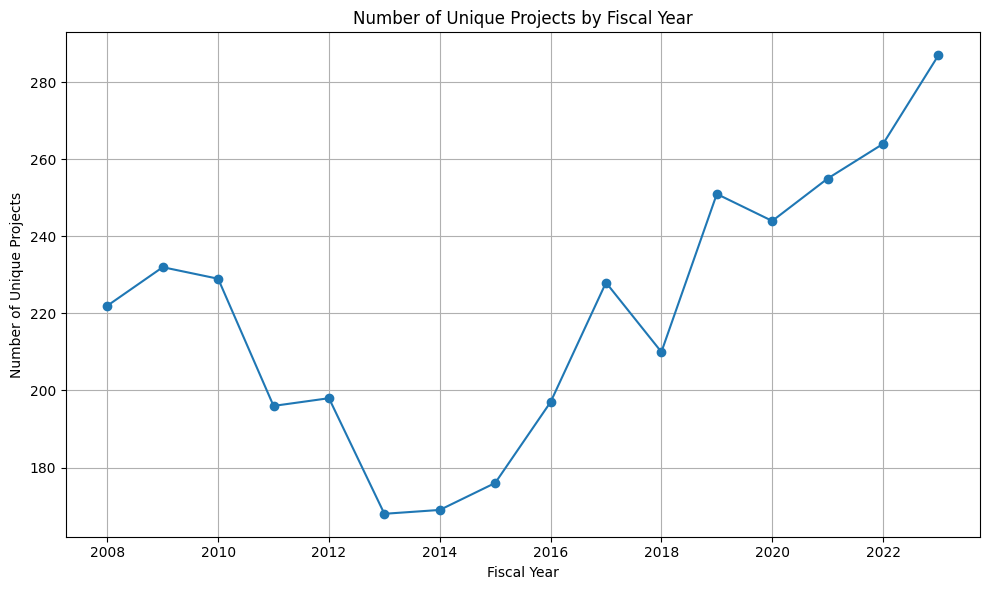

In [21]:
# Clean up column names
df.columns = df.columns.str.strip()

# Group by Fiscal Year and count unique Project Numbers
yearly_counts = df.groupby("Fiscal Year")["Project Number"].nunique().reset_index()

# Sort by Fiscal Year
yearly_counts = yearly_counts.sort_values("Fiscal Year")

# Plot as a line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts["Fiscal Year"], yearly_counts["Project Number"], marker='o')
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Unique Projects")
plt.title("Number of Unique Projects by Fiscal Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Filter rows where 'NIH Spending Categorization' equals 'Sickle Cell Disease'
Sickle_Cell_Disease_df = df[df["NIH Spending Categorization"].str.contains("Sickle Cell Disease", na=False)]

# Preview the result
Sickle_Cell_Disease_df.head(5)

,NIH Spending Categorization,Project Terms,Project Title,Public Health Relevance,Administering IC,Application ID,Award Notice Date,Opportunity Number,Project Number,Type,...,CFDA Code,Funding Mechanism,Fiscal Year,Total Cost,Total Cost(Sub Projects),Funding IC(s),Direct Cost IC,Indirect Cost IC,NIH COVID-19 Response,Total Cost IC
0,Clinical Research; Hematology; Rare Diseases; ...,Clinical Trials;Collaborations;Data Set;Diseas...,Collaborative Health Research Initiative Progr...,NaN,NHLBI,10975134,,,AHL14007001-1-0-1,,...,,Interagency Agreements,2023,606874,,NHLBI,,,,606874
1,Biotechnology; Clinical Research; Clinical Tri...,Advocate;Caregivers;Collaborations;Communities...,Cure Sickle Cell,NaN,NHLBI,10934820,9/26/2023,OTA-18-003,3OT3HL147741-01S4,3,...,837,Other,2023,3729772,,NHLBI,3729772,0,,3729772
2,Biotechnology; Hematology; Rare Diseases; Sick...,Address;Agreement;Annual Reports;Award;Biotech...,CureSC Manufacturing Resource Platform,NaN,NHLBI,10934634,9/26/2023,OTA-19-010,3OT3HL152932-01S3,3,...,837,Other,2023,1389793,,NHLBI,1389793,0,,1389793
4,Clinical Research; Clinical Trials and Support...,Adverse event;Biological Markers;Cellular Meta...,A Phase 1 Study to Evaluate the Safety and Tol...,NaN,NHLBI,10930552,,,1ZIAHL006284-01,1,...,,Intramural Research,2023,114449,,NHLBI,,,,114449
5,Bioengineering; Cardiovascular; Clinical Resea...,Abnormal Hemoglobins;Acute;Adopted;Affect;Afri...,Exploring Near Infrared Spectroscopy (NIRS) te...,NaN,NHLBI,10929214,,,1ZIAHL006283-01,1,...,,Intramural Research,2023,986763,,NHLBI,,,,986763


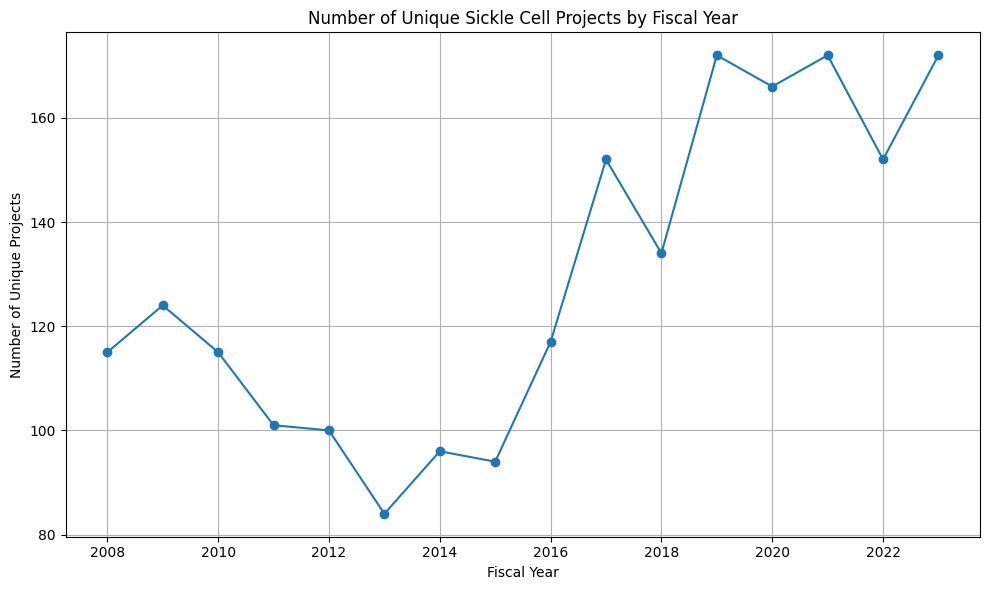

In [27]:
# Group by Fiscal Year and count unique Project Numbers
yearly_counts = Sickle_Cell_Disease_df.groupby("Fiscal Year")["Project Number"].nunique().reset_index()

# Sort by Fiscal Year
yearly_counts = yearly_counts.sort_values("Fiscal Year")

# Plot as a line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts["Fiscal Year"], yearly_counts["Project Number"], marker='o')
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Unique Projects")
plt.title("Number of Unique Sickle Cell Projects by Fiscal Year")
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph Number of Sickle Cell and Gene Therapy Projects By Start Date (Year)

### This is done since projects can span more than one fiscal year

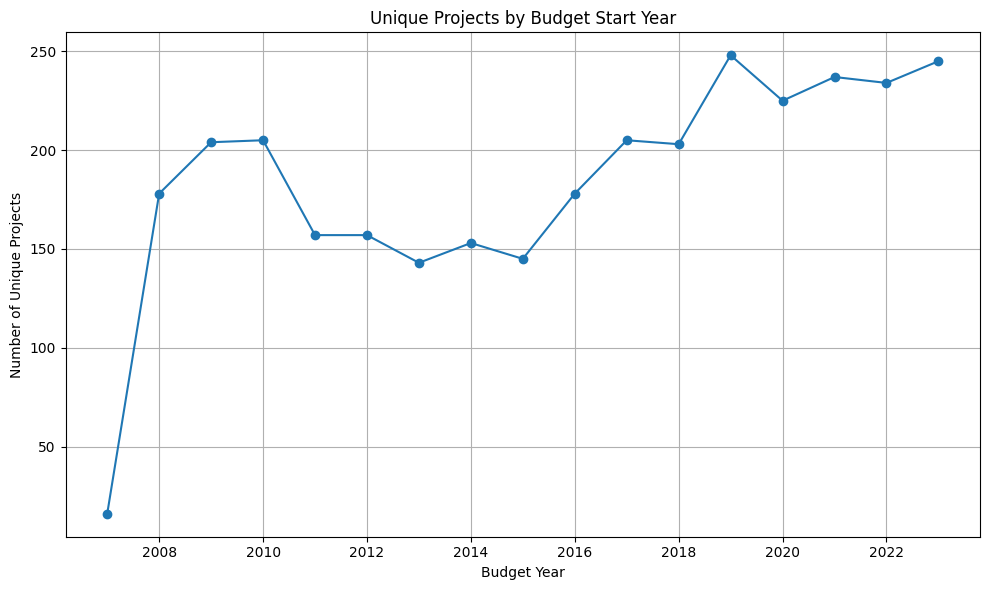

In [29]:
# Convert 'Budget Start Date' to datetime format
df["Budget Start Date"] = pd.to_datetime(df["Budget Start Date"], format="%m/%d/%y", errors='coerce')

# Extract the year as a new column
df["Budget Year"] = df["Budget Start Date"].dt.year

# Group by year and count unique project numbers
yearly_project_counts = df.groupby("Budget Year")["Project Number"].nunique().reset_index()

# Sort by year
yearly_project_counts = yearly_project_counts.sort_values("Budget Year")

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_project_counts["Budget Year"], yearly_project_counts["Project Number"], marker='o')
plt.xlabel("Budget Year")
plt.ylabel("Number of Unique Projects")
plt.title("Unique Projects by Budget Start Year")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\NAjani\AppData\Local\Temp\ipykernel_17032\1542348314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sickle_Cell_Disease_df["Budget Start Date"] = pd.to_datetime(df["Budget Start Date"], format="%m/%d/%y", errors='coerce')
C:\Users\NAjani\AppData\Local\Temp\ipykernel_17032\1542348314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sickle_Cell_Disease_df["Budget Year"] = Sickle_Cell_Disease_df["Budget Start Date"].dt.year


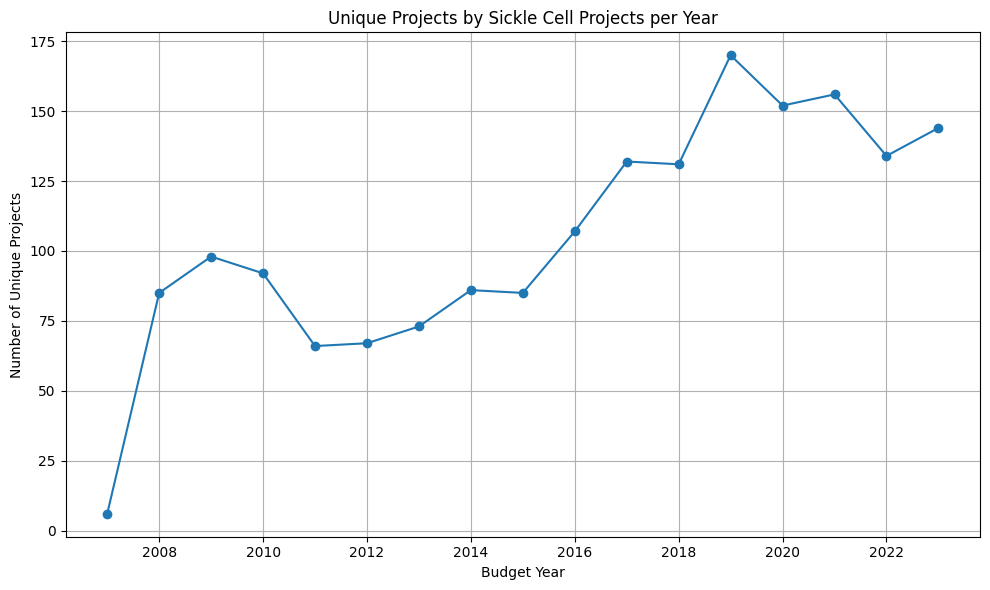

In [31]:
# Convert 'Budget Start Date' to datetime format
Sickle_Cell_Disease_df["Budget Start Date"] = pd.to_datetime(df["Budget Start Date"], format="%m/%d/%y", errors='coerce')

# Extract the year as a new column
Sickle_Cell_Disease_df["Budget Year"] = Sickle_Cell_Disease_df["Budget Start Date"].dt.year

# Group by year and count unique project numbers
yearly_project_counts = Sickle_Cell_Disease_df.groupby("Budget Year")["Project Number"].nunique().reset_index()

# Sort by year
yearly_project_counts = yearly_project_counts.sort_values("Budget Year")

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_project_counts["Budget Year"], yearly_project_counts["Project Number"], marker='o')
plt.xlabel("Budget Year")
plt.ylabel("Number of Unique Projects")
plt.title("Unique Projects by Sickle Cell Projects per Year")
plt.grid(True)
plt.tight_layout()
plt.show()